<a href="https://colab.research.google.com/github/sumam121/Wine-Quality-Prediction/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# WINE QUALITY PREDICTION.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


DATASET-->https://dme2wmiz2suov.cloudfront.net/User(88900811)/Course(35220)/Section(162883)/Exercise(42187)/Assignment/1729258-1613615-Stock_Price_data_set_(1).xlsx?Expires=1743004951&Signature=HEp6aH7TycDQumVRIqSQKi8AOCXIhFGfUAvlZJHiDw1XWYC0TqD9ZmXPRKkKmbC1Ur5Gh6ezVJWv3mua~EzPdN7ZIRmPO758JLTUPGvZMwn5j3Nq8Awa~-e7bm2eq1E~N4yBzbSye1KTMRZ4MPSdLDuQtnoLM2YmISxjE9CaSDH6kTz9LJJJT8LUwzQWper1~YUD44Q7kcgl5aiGYW3vBearWS~3Ay9Oolr7JoDzivN9nN5bA-WrHeCXprcUoI9DnTzcAnKpwlGVRexrfA6lOQj4xd6iON6bPTNjkV1K9DCTE-WnaQ6HoNPTvAAGouFnQb-fv0ZVC9SYQykHDfhbwQ__&Key-Pair-Id=APKAIIFZDCEANAVU2VTA

In [ ]:
df = pd.read_csv("Red_wine__(1).csv",sep=',')
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                   NaN   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4      5.0  
1      9.8      5.0  
2      9.8      5.0  
3      9.8      6.0  
4      9.4      5.0  
5      9.4      5.0  
6      9.4      5.0  
7     10.0      7.0  
8      9.5      7.0  
9     10.5      5.0

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [ ]:
#Filling missing values values with mean of the numerical data
mean_total_sulfur_dioxide=df['total sulfur dioxide'].mean()
mean_pH=df['pH'].mean()
mean_quality=df['quality'].mean()

In [ ]:
mean_total_sulfur_dioxide=round(mean_total_sulfur_dioxide,1)
mean_pH=round(mean_pH,2)
mean_pH=round(mean_quality,1)




In [ ]:
print(mean_total_sulfur_dioxide,mean_pH,mean_pH)



46.4 5.6 5.6


In [ ]:
df['total sulfur dioxide']=df['total sulfur dioxide'].fillna(mean_total_sulfur_dioxide)
df['pH']=df['pH'].fillna(mean_pH)
df['quality']=df['quality'].fillna(mean_quality)

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#Handling duplicate values

In [ ]:
print("Number of duplicates in wine data:", df.duplicated().sum())


Number of duplicates in wine data: 239


In [ ]:
print('Shape of the dataset having duplicates', df.shape)

Shape of the dataset having duplicates (1599, 12)


In [ ]:
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.112784          0.076703     0.035081   
density                    0.668047          0.022026     0.364947   
pH                         0.010305         -0.031819     0.002753   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.123985         -0.390132     0.225730   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.200535   0.047813             0.668149   
density                     0.355283   0.200632            -0.021946   
pH                          0.027274  -0.218897            -0.031557   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013756  -0.129010            -0.050896   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.112784  0.668047  0.010305   0.183006   
volatile acidity                  0.076703  0.022026 -0.031819  -0.260987   
citric acid                       0.035081  0.364947  0.002753   0.312770   
residual sugar                    0.200535  0.355283  0.027274   0.005527   
chlorides                         0.047813  0.200632 -0.218897   0.371260   
free sulfur dioxide               0.668149 -0.021946 -0.031557   0.051658   
total sulfur dioxide              1.000000  0.070742 -0.129567   0.042099   
density                           0.070742  1.000000 -0.029914   0.148506   
pH                               -0.129567 -0.029914  1.000000  -0.224310   
sulphates                         0.042099  0.148506 -0.224310   1.000000   
alcohol                          -0.205914 -0.496180  0.180872   0.093595   
quality                          -0.184654 -0.174730  0.118242   0.251073   

                       alcohol   quality  
fixed acidity        -0.061668  0.123985  
volatile acidity     -0.202288 -0.390132  
citric acid           0.109903  0.225730  
residual sugar        0.042075  0.013756  
chlorides            -0.221141 -0.129010  
free sulfur dioxide  -0.069408 -0.050896  
total sulfur dioxide -0.205914 -0.184654  
density              -0.496180 -0.174730  
pH                    0.180872  0.118242  
sulphates             0.093595  0.251073  
alcohol               1.000000  0.475832  
quality               0.475832  1.000000

In [ ]:
df = df.drop_duplicates()
df.reset_index(drop=True,inplace=True)
df.shape
print('Shape of dataset with no duplicates', df.shape)


Shape of dataset with no duplicates (1360, 12)


# Handling Outliers
#using boxplot

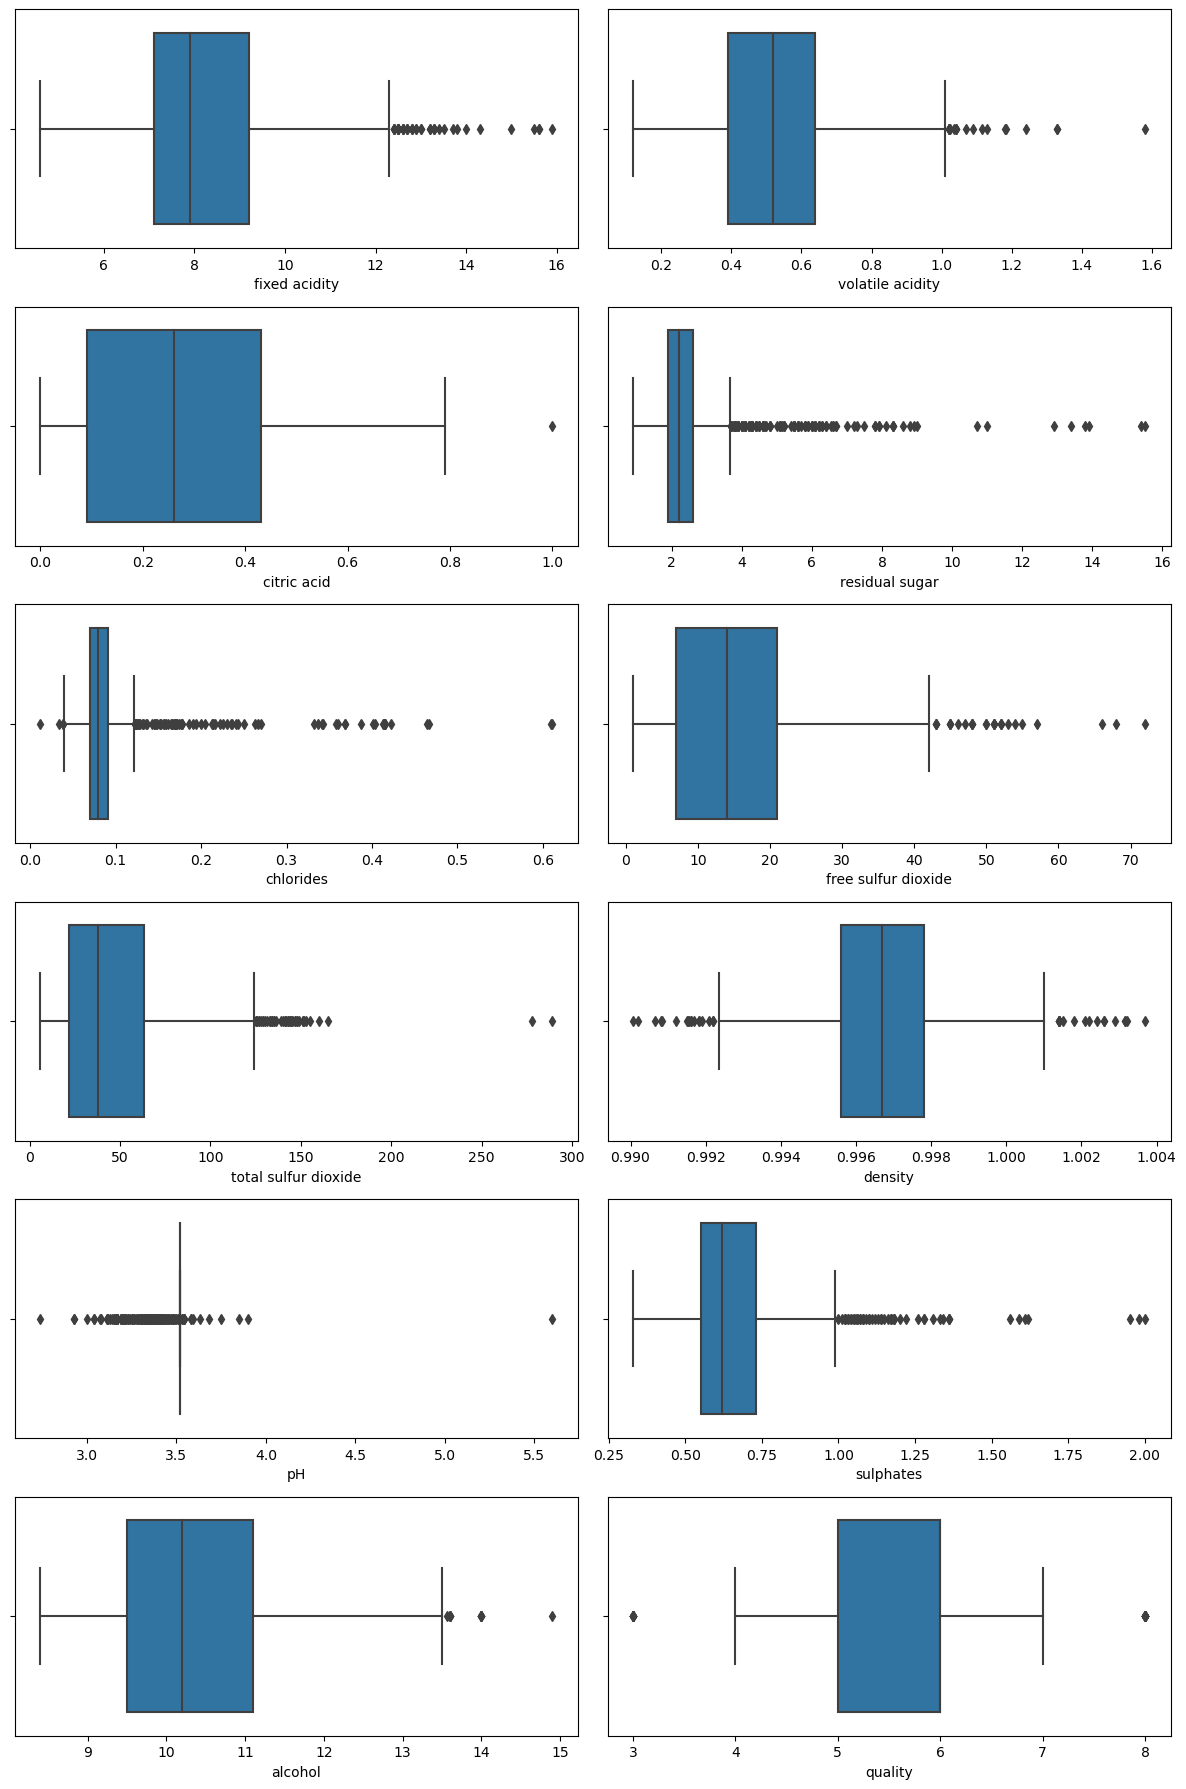

In [ ]:
plt.figure(figsize=(12, 18))
parameters = df.columns.tolist()
for i, parameters in enumerate(parameters):


    plt.subplot(6, 2, i+1)

    sns.boxplot(data=df,x=parameters)
plt.tight_layout()
plt.show()

# Using Z_SCORE TO REMOVE OUTLIERS

In [ ]:
from scipy import stats


In [ ]:

col=df.columns.tolist()
col.remove('quality')

In [ ]:
#Z_score of each column attribute

z_scores = stats.zscore(df[col])
z_scores.head()


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.524238          0.932453    -1.393997       -0.462085  -0.245447   
1      -0.293804          1.916605    -1.393997        0.054599   0.200414   
2      -0.293804          1.260504    -1.189297       -0.166837   0.078815   
3       1.664889         -1.363904     1.471814       -0.462085  -0.265714   
4      -0.524238          0.713752    -1.393997       -0.535897  -0.265714   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.468802             -0.384182  0.583715  0.108045  -0.579237   
1             0.872242              0.604305  0.048319 -3.007683   0.124227   
2            -0.085646              0.214901  0.155399 -2.404639  -0.051639   
3             0.105931              0.394626  0.690795 -3.409713  -0.461993   
4            -0.277224             -0.204457  0.583715  0.108045  -0.579237   

    alcohol  
0 -0.954770  
1 -0.584835  
2 -0.584835  
3 -0.584835  
4 -0.954770

In [ ]:
threshold = 3
# Identify the rows with outliers
outlier_rows = np.where(np.abs(z_scores) > threshold)[0]
outlier_rows


array([   1,    3,   12,   13,   13,   14,   14,   14,   16,   16,   16,
         18,   18,   21,   22,   30,   31,   36,   39,   40,   42,   47,
         50,   51,   53,   54,   74,   76,   76,   76,   78,   78,   81,
         81,   83,   83,   86,   86,   88,   97,   97,   97,  100,  101,
        102,  103,  105,  114,  115,  116,  123,  128,  130,  132,  136,
        136,  136,  136,  142,  143,  145,  146,  147,  151,  151,  151,
        159,  160,  160,  163,  177,  203,  203,  212,  215,  227,  227,
        242,  246,  253,  283,  296,  297,  303,  310,  329,  335,  347,
        347,  362,  364,  386,  386,  394,  409,  421,  421,  434,  449,
        474,  484,  484,  486,  486,  493,  507,  511,  514,  517,  529,
        535,  553,  556,  563,  563,  565,  566,  566,  566,  583,  583,
        593,  598,  600,  627,  628,  633,  653,  672,  673,  688,  711,
        723,  765,  765,  782,  787,  792,  793,  839,  867,  889,  896,
        896,  913,  919,  919,  921,  921,  949,  9

In [ ]:
df.reset_index(drop=True, inplace=True)
df_outliers_removed = df.drop(outlier_rows)
print("Original Dataset Shape:",df.shape)
print("Outlier-Removed Dataset Shape:", df_outliers_removed.shape)


Original Dataset Shape: (1360, 12)
Outlier-Removed Dataset Shape: (1220, 12)


In [ ]:
df.groupby("quality").mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                  
3.000000       8.360000          0.884500     0.171000        2.635000   
4.000000       7.779245          0.693962     0.174151        2.694340   
5.000000       8.170364          0.578232     0.245147        2.515598   
5.636421       8.000000          0.710000     0.000000        2.600000   
6.000000       8.337383          0.496084     0.279364        2.457290   
7.000000       8.858683          0.403653     0.371856        2.716766   
8.000000       8.441176          0.427647     0.382941        2.576471   

          chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                    
3.000000   0.122500            11.000000             24.900000  0.997464   
4.000000   0.090679            12.264151             36.245283  0.996542   
5.000000   0.093955            17.171577             57.427903  0.997083   
5.636421   0.080000            11.000000             34.000000  0.997600   
6.000000   0.085075            15.637383             40.816822  0.996565   
7.000000   0.076832            13.994012             35.449102  0.996051   
8.000000   0.068353            13.764706             34.470588  0.995095   

                pH  sulphates    alcohol  
quality                                   
3.000000  3.520000   0.570000   9.955000  
4.000000  3.485660   0.596415  10.265094  
5.000000  3.483657   0.624038   9.890295  
5.636421  3.440000   0.530000   9.500000  
6.000000  3.511944   0.674542  10.658879  
7.000000  3.513772   0.742635  11.491118  
8.000000  3.520000   0.774706  12.158824

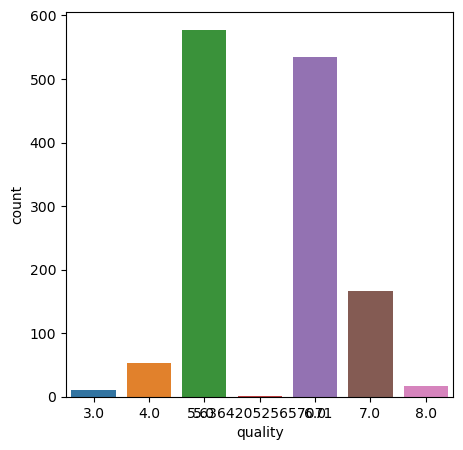

In [ ]:
sns.countplot(x="quality",data=df)
plt.show()

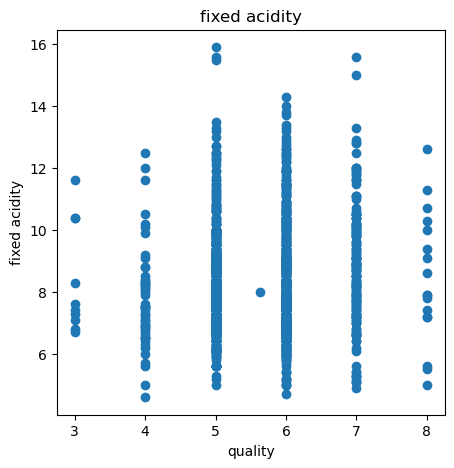

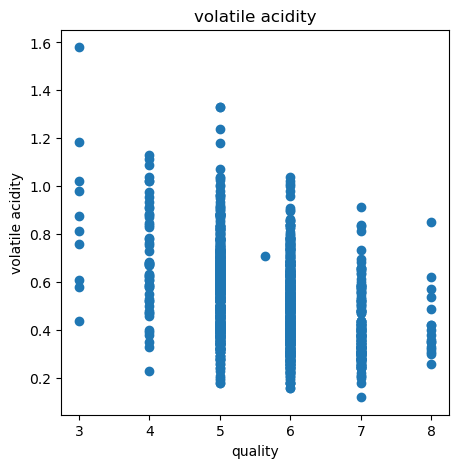

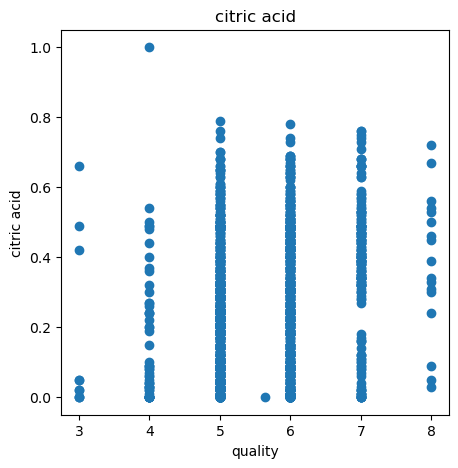

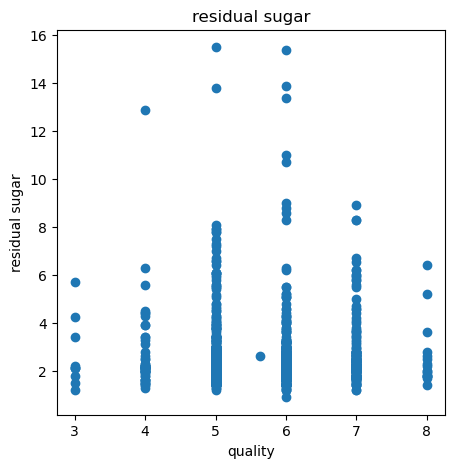

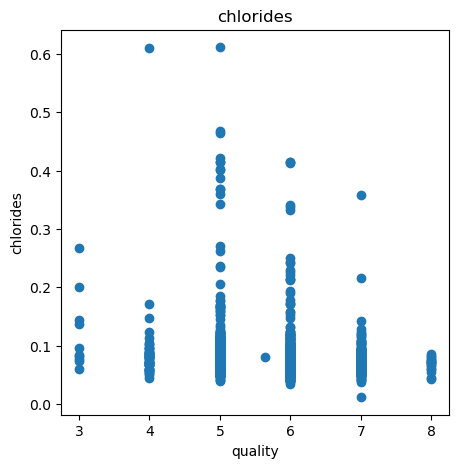

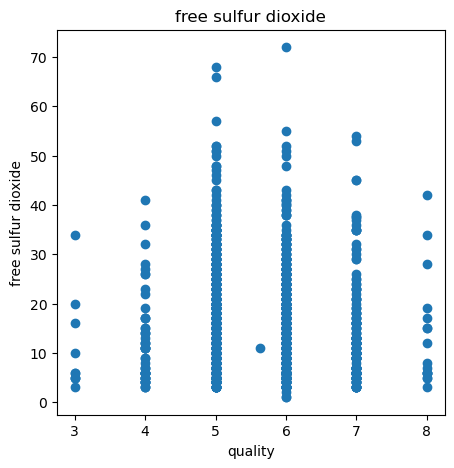

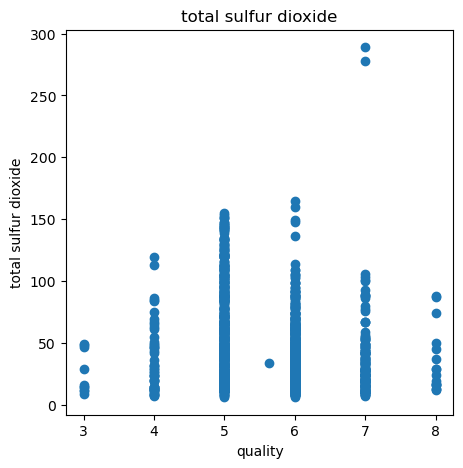

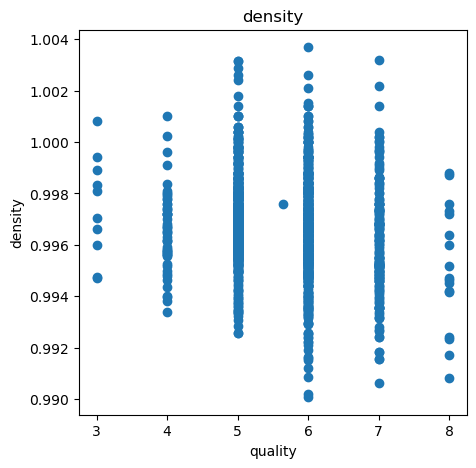

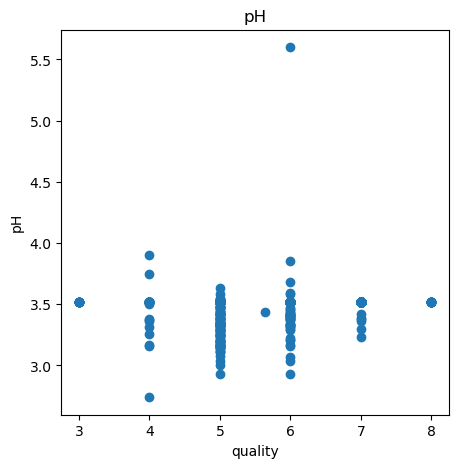

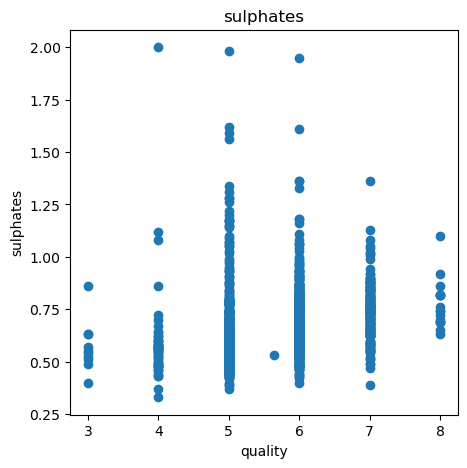

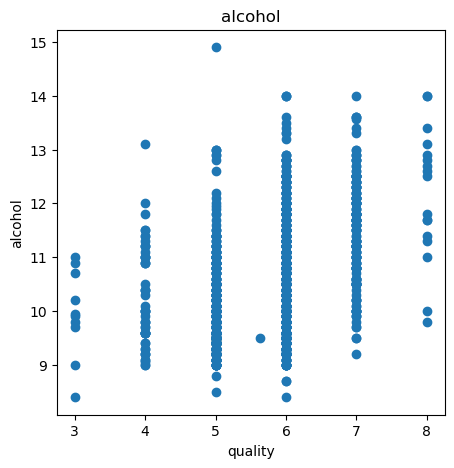

In [ ]:
for label in df.columns[:-1]:
# for label in ['alcohol']:
    plt.scatter(df['quality'], df[label])
    plt.title(label)
    plt.xlabel('quality')
    plt.ylabel(label)
    plt.rcParams['figure.figsize'] = [5, 5]

    plt.show()

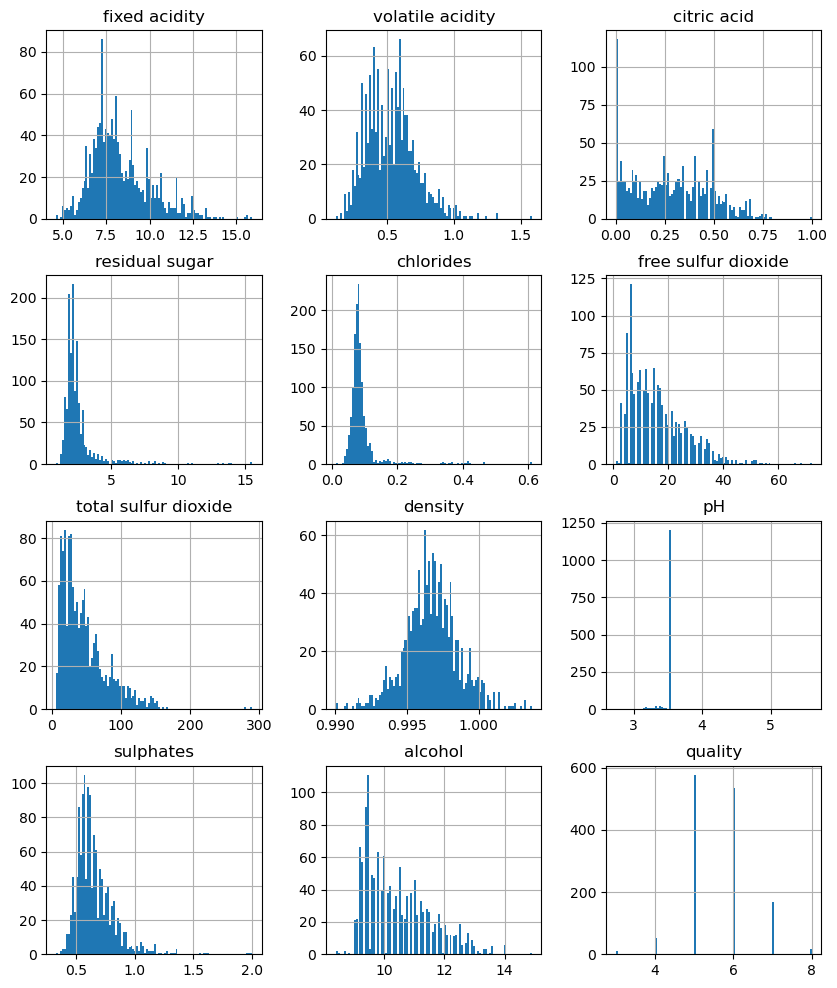

In [ ]:
df.hist(bins=100, figsize=(10,12))
plt.show()

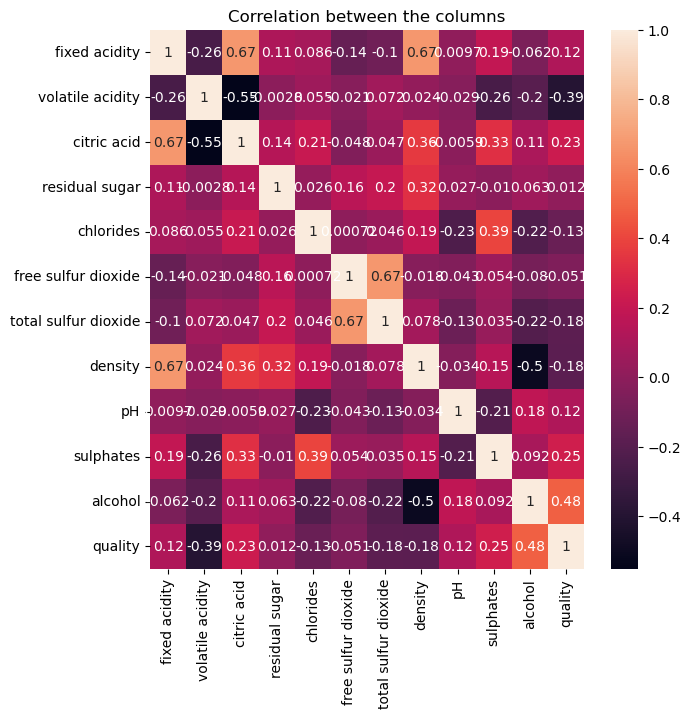

In [ ]:
#Heat Map for expressing Correlation
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

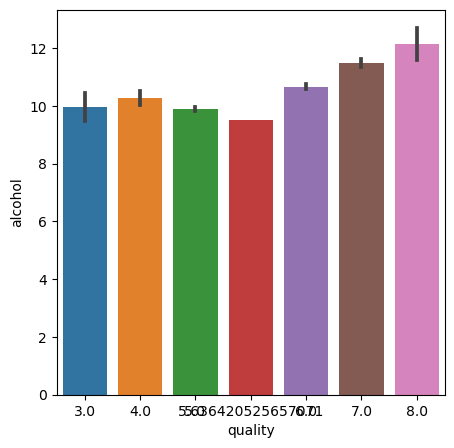

In [ ]:
sns.barplot(df['quality'], df['alcohol'])

In [ ]:
df['quality'].dtype

dtype('float64')

In [ ]:
#Feature Selection
# Create Classification version of target variable
threshold1=6
threshold2=5
df['quality']=df['quality'].apply(lambda x:'good' if x>threshold1 else ('avg' if x>threshold2 else 'bad'))
df['quality'] = pd.Categorical(df['quality'],categories=['bad','avg','good'])

In [ ]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol quality  
0      9.4     bad  
1      9.8     bad  
2      9.8     bad  
3      9.8     avg  
4      9.4     bad

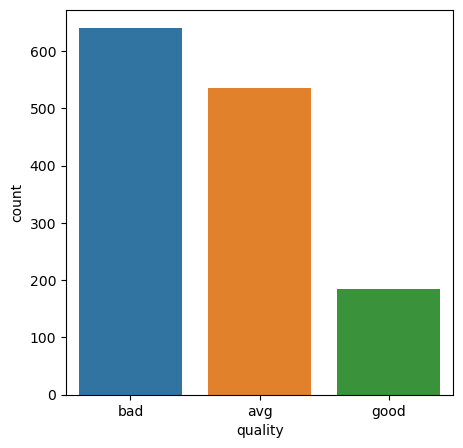

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='quality',data=df)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.tree import plot_tree

In [ ]:
# Feature Standardisation

In [ ]:
parameters = df.columns.tolist()
parameters

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [ ]:
parameters.remove("quality")

std_scaler = StandardScaler()
df.loc[:, parameters] = std_scaler.fit_transform(df.loc[:, parameters])

In [ ]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.524238          0.932453    -1.393997       -0.462085  -0.245447   
1      -0.293804          1.916605    -1.393997        0.054599   0.200414   
2      -0.293804          1.260504    -1.189297       -0.166837   0.078815   
3       1.664889         -1.363904     1.471814       -0.462085  -0.265714   
4      -0.524238          0.713752    -1.393997       -0.535897  -0.265714   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.468802             -0.384182  0.583715  0.108045  -0.579237   
1             0.872242              0.604305  0.048319 -3.007683   0.124227   
2            -0.085646              0.214901  0.155399 -2.404639  -0.051639   
3             0.105931              0.394626  0.690795 -3.409713  -0.461993   
4            -0.277224             -0.204457  0.583715  0.108045  -0.579237   

    alcohol quality  
0 -0.954770     bad  
1 -0.584835     bad  
2 -0.584835     bad  
3 -0.584835     avg  
4 -0.954770     bad

In [ ]:
X = df.loc[:, ~df.columns.isin(['quality'])]
y = df.iloc[:,df.columns == 'quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
X_train.head()


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
865        1.261629         -0.762477     0.960062       -0.240649  -0.265714   
1290      -0.985107          0.932453    -0.984596        0.054599   0.362545   
394        0.051848         -0.871827     1.318288       -0.535897   6.584334   
731       -1.100325          0.604402    -0.319318       -0.535897  -0.144115   
54        -0.466630          0.549727    -0.779895        1.899901   0.463877   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
865             -0.181435             -0.593861 -0.390705  0.208553   
1290            -0.181435             -0.593861 -0.031990  0.208553   
394             -0.660380             -0.623815  0.637255  0.208553   
731             -0.181435             -0.474044  0.096505  0.208553   
54               3.266963              1.892333  0.851413 -2.404639   

      sulphates   alcohol  
865    1.062179  0.894905  
1290  -0.461993 -0.214900  
394    2.351864 -1.232221  
731    0.006983 -0.584835  
54     0.651825 -0.954770

In [ ]:
y_train.head()


quality
865      avg
1290     bad
394      avg
731      bad
54       bad

In [ ]:
# Cleaning test sets to avoid future warning messages
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()


#BUILDING MACHINE LEARNING MODELS
1.RANDOM FOREST CLASSIFIER


In [ ]:
random_forest_classifier = RandomForestClassifier(random_state=42)

In [ ]:
random_forest_classifier = RandomForestClassifier(random_state=42)


Hyperparameter tuning using GridSearch CV


In [ ]:
import time

In [ ]:
start = time.time()
param_dict = {
'bootstrap': [True, False],'max_depth': [5,10,12],
'max_features': ['auto', 'sqrt', 'log2', None],
'min_samples_split': [5, 10, 12],
'n_estimators': [100, 200, 300],
'criterion': ['gini', 'entropy']
}
cv_random_forest = GridSearchCV(estimator=random_forest_classifier, cv = 5, param_grid=param_dict, n_jobs = 3)
cv_random_forest.fit(X_train, y_train)

best_params = cv_random_forest.best_params_
print("Best Hyperparameters:", best_params)
rf_best = cv_random_forest.best_estimator_
print("Best estimators:",rf_best)
end = time.time()
print('Time taken in grid search CV: {0: .2f}'.format(end - start))

Best Hyperparameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'min_samples_split': 12, 'n_estimators': 300}
Best estimators: RandomForestClassifier(max_depth=12, min_samples_split=12, n_estimators=300,
                       random_state=42)
Time taken in grid search CV:  885.68


    #TRAINING THE MODEL WITH BEST HYPER_PARAMETERS



In [ ]:
random_forest_classifier = RandomForestClassifier(random_state=42, **best_params)
random_forest_classifier


RandomForestClassifier(max_depth=12, min_samples_split=12, n_estimators=300,
                       random_state=42)

#PLOTTING DECISION_TREE



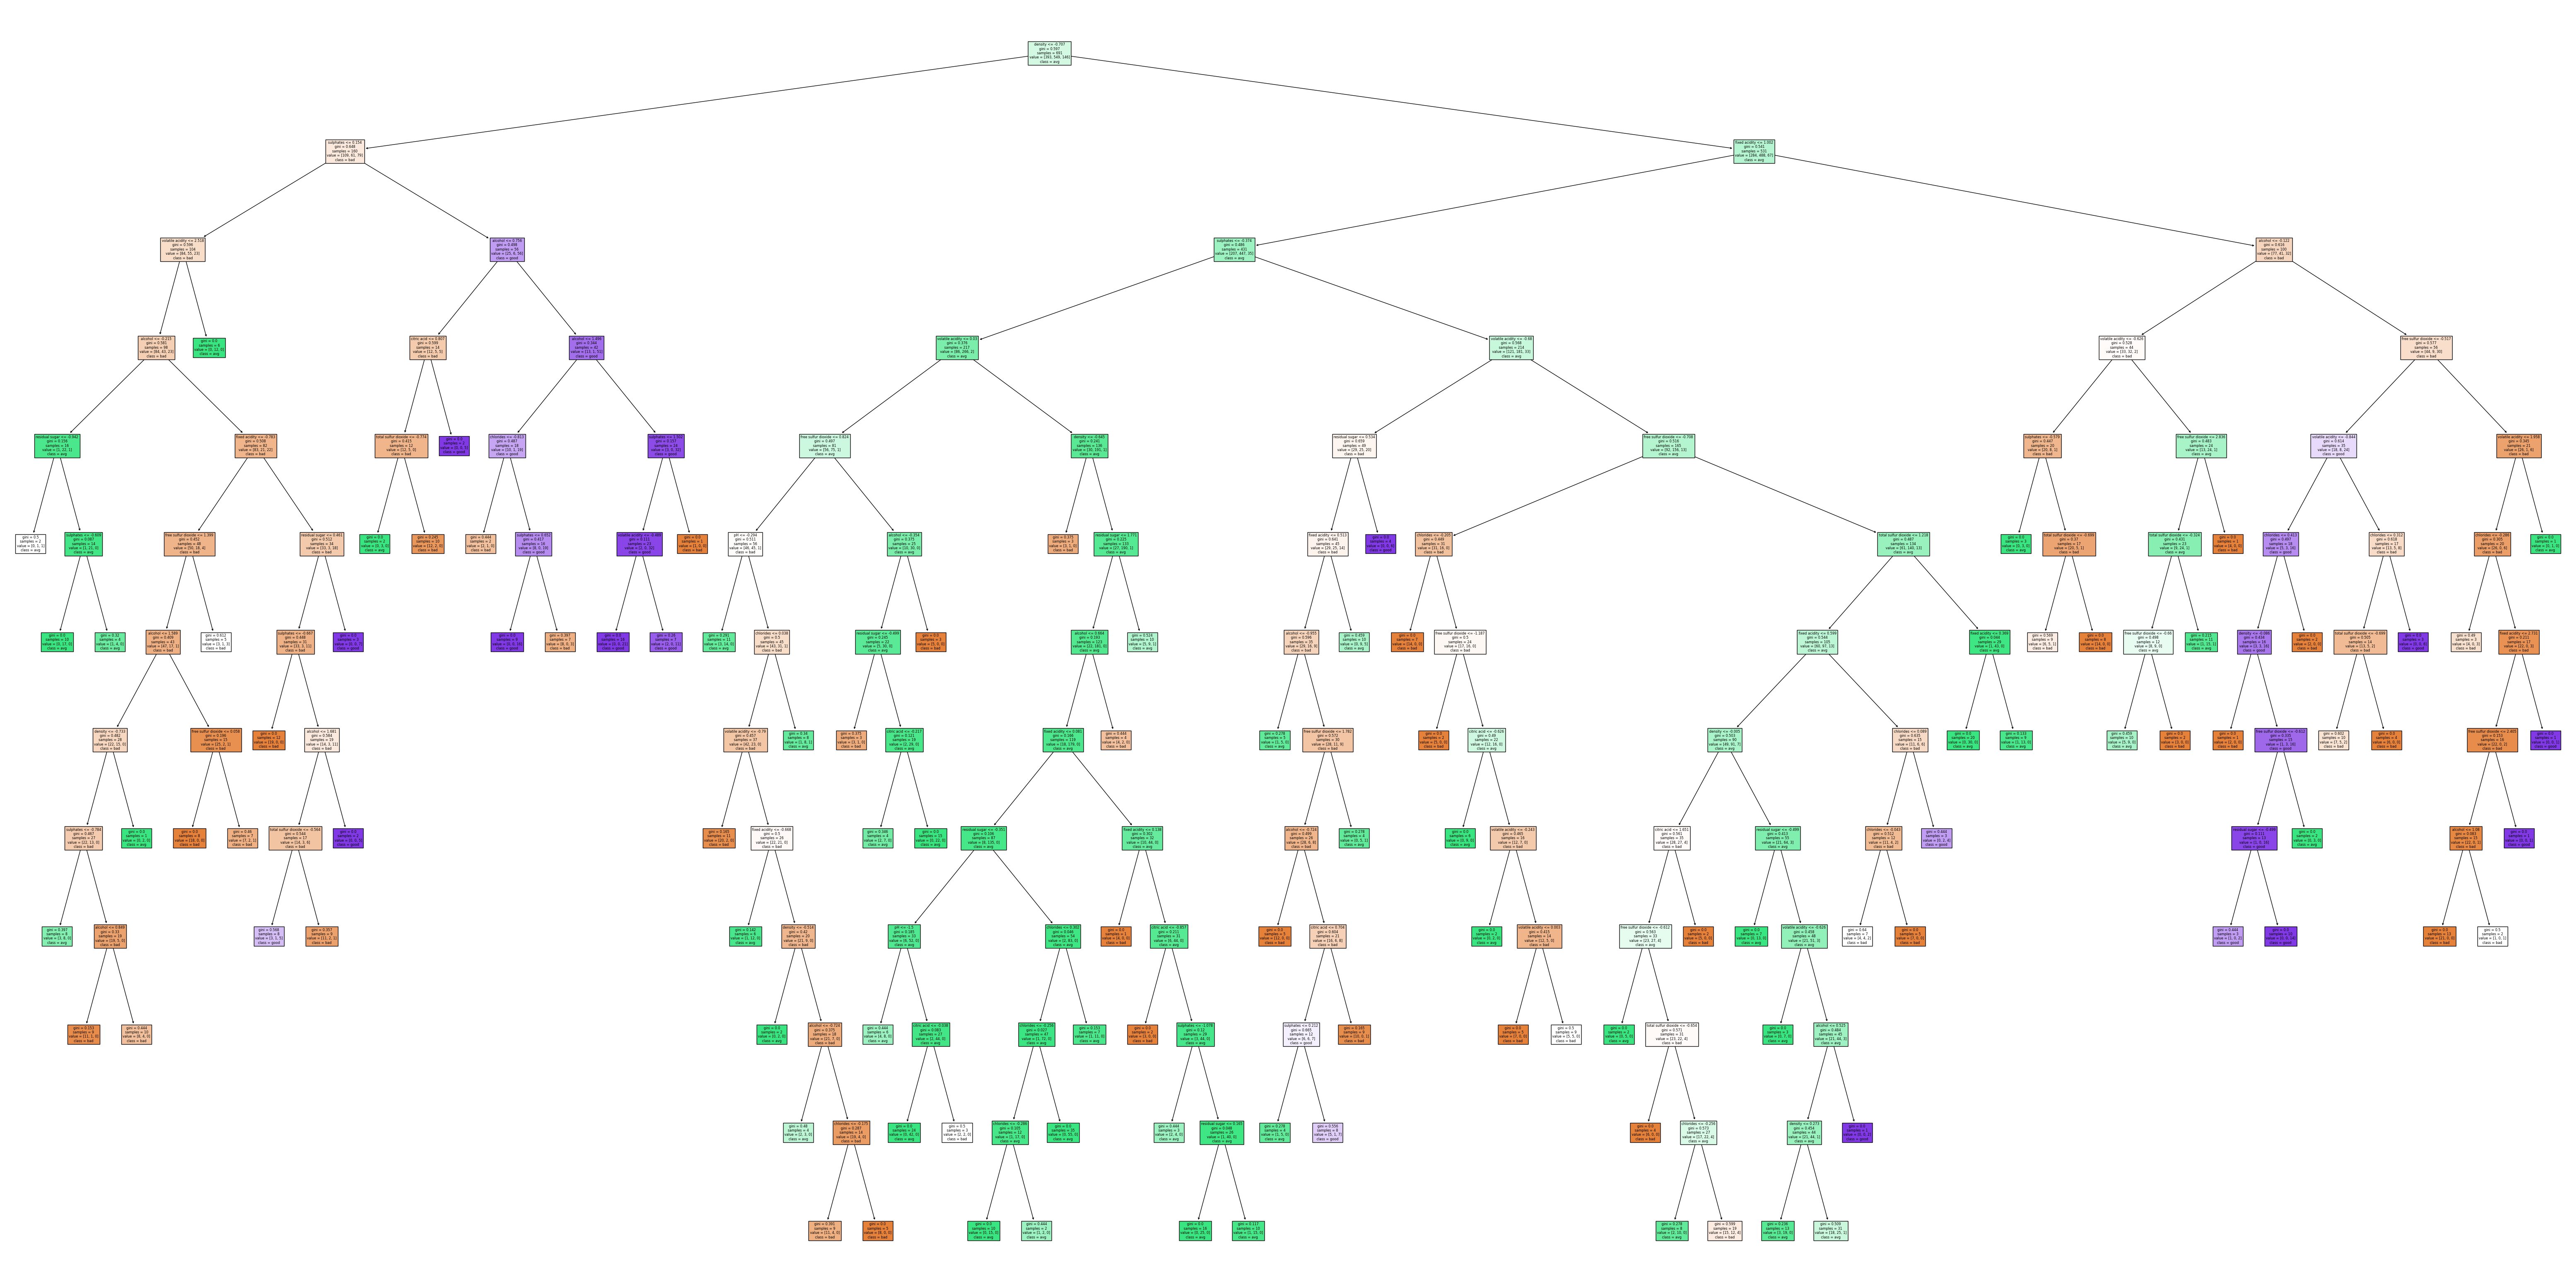

In [ ]:
plt.figure(figsize=(80, 40))
plot_tree(rf_best.estimators_[10], feature_names=X.columns, class_names=['bad','avg', 'good'], filled=True)
plt.show()

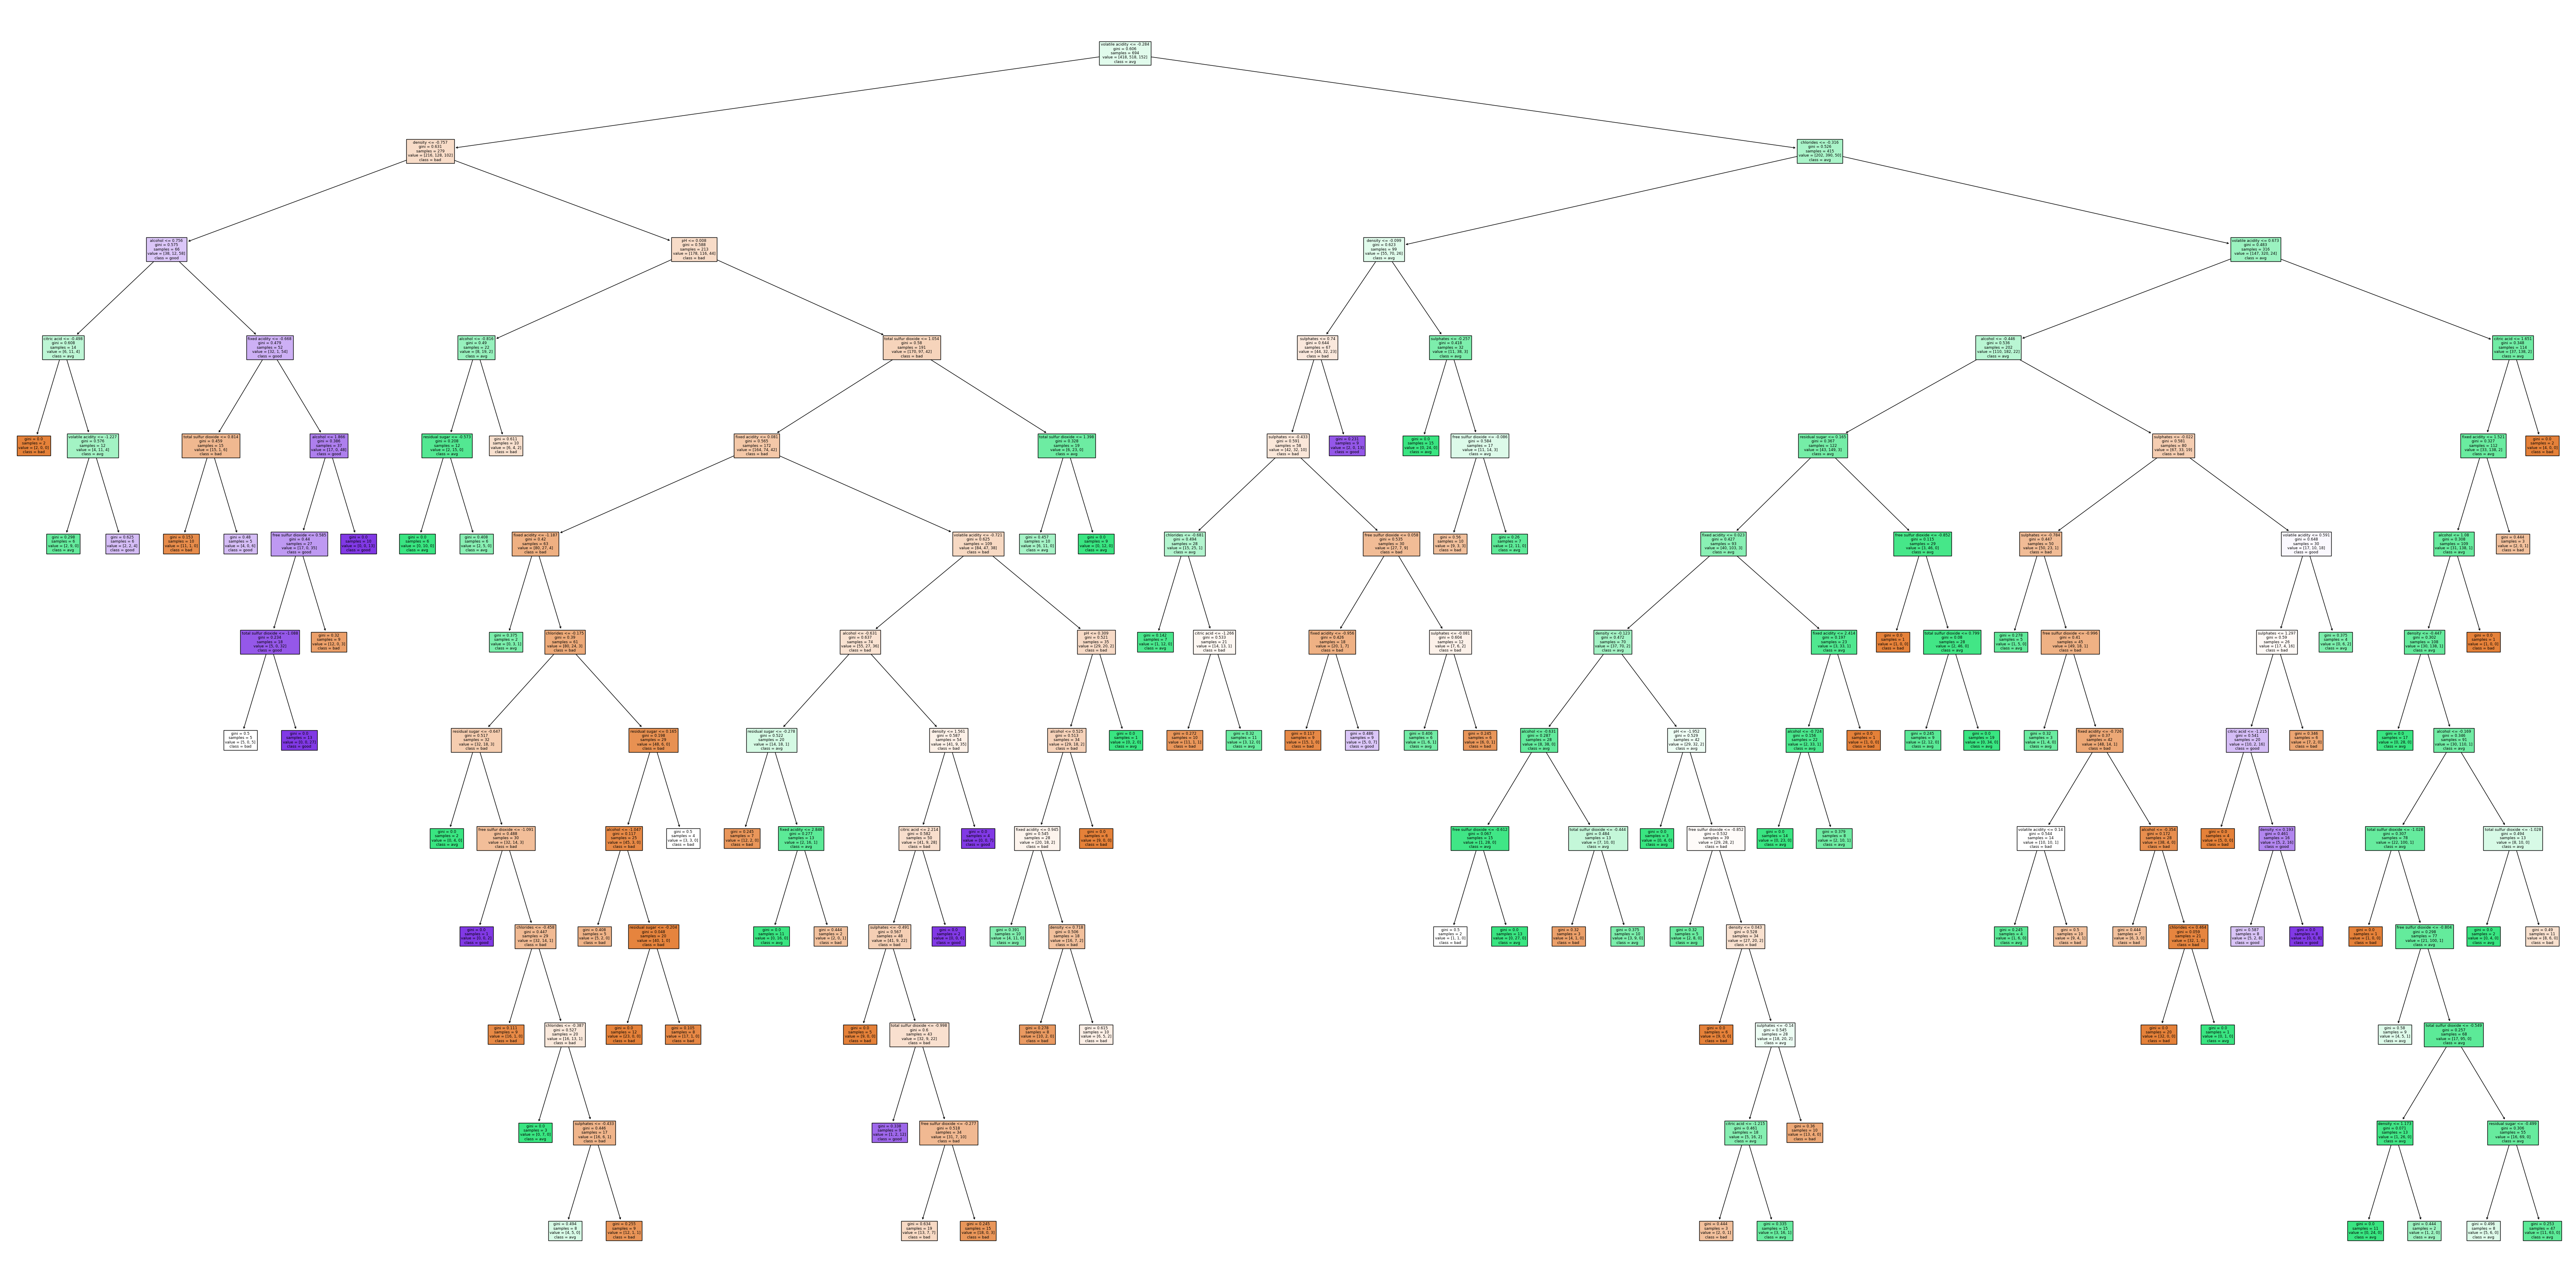

In [ ]:
plt.figure(figsize=(80, 40))
plot_tree(rf_best.estimators_[40], feature_names=X.columns, class_names=['bad','avg', 'good'], filled=True)
plt.show()

#OOB Error Rate


In [ ]:
random_forest_classifier.set_params(warm_start=False, oob_score=True)
min_estimators = 15
max_estimators = 300
error_rate = {}
for i in range(min_estimators, max_estimators + 1):
    random_forest_classifier.set_params(n_estimators=i)
    random_forest_classifier.fit(X_train, y_train)
    #The OOB score represents the accuracy of the model on the unseen data that is not used for training.
    oob_error = 1 - random_forest_classifier.oob_score_
    error_rate[i] = oob_error

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably me

In [ ]:
# Convert dictionary to a pandas series for easy plotting
oob_series = pd.Series(error_rate)


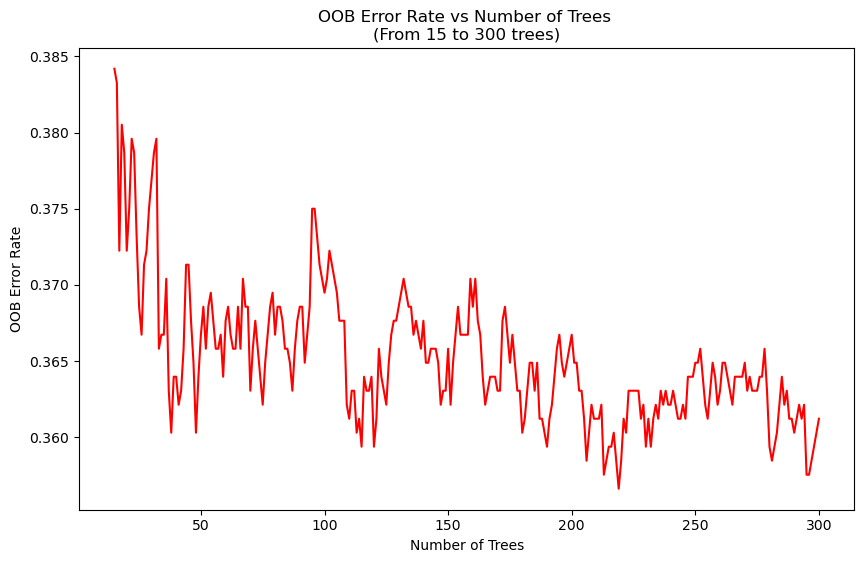

In [ ]:
# Plot the OOB error rate versus the number of trees
plt.figure(figsize=(10, 6))
oob_series.plot(kind='line',color = 'red')
plt.xlabel('Number of Trees')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate vs Number of Trees \n(From 15 to 300 trees)')
plt.show()

In [ ]:
print('OOB Error rate for 200 trees is: {0:.5f}'.format(oob_series[200]))

OOB Error rate for 200 trees is: 0.36673


In [ ]:
best_params['n_estimators']

300

In [ ]:
# Refine the tree via OOB Output
random_forest_classifier.set_params(n_estimators=best_params['n_estimators'], bootstrap = True, oob_score=False)

RandomForestClassifier(max_depth=12, min_samples_split=12, n_estimators=300,
                       random_state=42)

In [ ]:
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, min_samples_split=12, n_estimators=300,
                       random_state=42)

In [ ]:
#PREDICT USING TEST DATASET

In [ ]:
y_pred_rf = random_forest_classifier.predict(X_test)


CHECKING ACCURACY SCORE

In [ ]:
acc = metrics.accuracy_score(y_test, y_pred_rf)
print("Accuracy score of Random forest classifier {:.2f}%".format(acc*100))


Accuracy score of Random forest classifier 64.71%


In [ ]:
predicted_df = {'predicted_values': y_pred_rf, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(40)

predicted_values original_values
0               bad             avg
1               avg             avg
2              good            good
3               avg             avg
4               avg             bad
5               avg             avg
6               avg            good
7               avg             avg
8               avg             avg
9               bad             bad
10              bad             bad
11             good             bad
12              bad             avg
13              bad             bad
14              avg             avg
15              bad             bad
16              bad             bad
17              bad             bad
18              avg             avg
19              bad             bad
20              bad             bad
21              avg             avg
22              bad             avg
23              bad             bad
24              bad             avg
25              bad             bad
26              avg            good
27              avg             avg
28              avg             avg
29              avg             bad
30             good            good
31              bad             bad
32              bad             bad
33              avg             avg
34              bad             bad
35             good            good
36              bad             bad
37              avg             avg
38              bad             bad
39              bad             avg

In [ ]:
#CLASSIFICATION REPORT

In [ ]:
print("classification_report of the model:")
print(classification_report(y_pred_rf, y_test))

classification_report of the model:
              precision    recall  f1-score   support

         avg       0.60      0.57      0.59       117
         bad       0.75      0.74      0.75       131
        good       0.38      0.50      0.43        24

    accuracy                           0.65       272
   macro avg       0.58      0.60      0.59       272
weighted avg       0.65      0.65      0.65       272



CONFUSION MATRIX

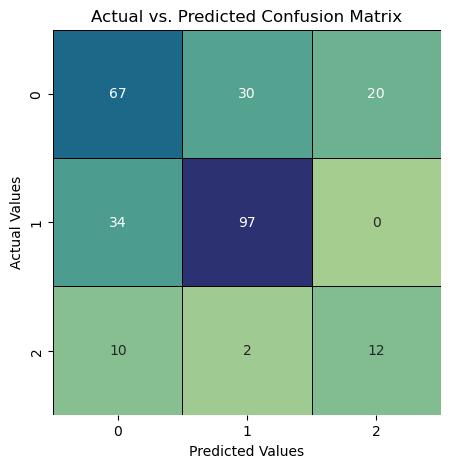

In [ ]:
confusion_mat = confusion_matrix(y_pred_rf, y_test)
sns.heatmap(confusion_mat,cmap="crest", annot=True, fmt='d', cbar=False, linewidths=0.5, linecolor='black')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

#Out-of-Bag (OOB) Rate

In [ ]:
oob_error = 1 - random_forest_classifier.oob_score_
print("OOB Error:", oob_error)
print("OOB Score:", random_forest_classifier.oob_score_)


OOB Error: 0.36121323529411764
OOB Score: 0.6387867647058824


In [ ]:
#Support Vector Machine

In [ ]:
from sklearn.svm import SVC

# creating the model
model2 = SVC()

# feeding the training set into the model
model2.fit(X_train, y_train)

# predicting the results for the test set
y_pred2 = model.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", model2.score(X_train, y_train))
print("Testing accuracy :", model2.score(X_test, y_test))
print("Accuracy Score :",accuracy_score(y_test,y_pred2))


Training accuracy : 0.6801470588235294
Testing accuracy : 0.6985294117647058
Accuracy Score : 0.5330882352941176


In [ ]:
# finding the best parameters for the SVC model

param = {
    'C': [0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(model2, param_grid = param, scoring = 'accuracy', cv = 10)

In [ ]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [ ]:
grid_svc.best_params_


{'C': 1.2, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:

# creating a new SVC model with these best parameters

model_21 = SVC(C = 1.4, gamma = 0.1, kernel = 'rbf')
model_21.fit(X_train, y_train)
y_pred_21 = model_21.predict(X_test)
print("ACCURACY SCORE",accuracy_score(y_test,y_pred_21))

print(classification_report(y_test, y_pred_21))

ACCURACY SCORE 0.7132352941176471
              precision    recall  f1-score   support

         avg       0.64      0.68      0.66       111
         bad       0.80      0.81      0.80       129
        good       0.61      0.44      0.51        32

    accuracy                           0.71       272
   macro avg       0.68      0.64      0.66       272
weighted avg       0.71      0.71      0.71       272



In [ ]:
#Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model3.fit(X_train,y_train)
y_pred_dt = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred_dt))

Accuracy Score: 0.5330882352941176


#USING KNN

In [ ]:

model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(X_train,y_train)
y_pred4 = model4.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred4))

Accuracy Score: 0.5625


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
#LOGISTIC REGRESSION MODEL
model5 = LogisticRegression()
model5.fit(X_train,y_train)
y_pred5 = model5.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(y_test,y_pred5))

Accuracy Score: 0.5330882352941176


In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'SVC','Decision Tree' ,'Random Forest'],
    'Accuracy_Score': [0.533,0.563,0.713,0.533,0.647]})

result_df = results.sort_values(by='Accuracy_Score', ascending=False)
result_df = result_df.set_index('Accuracy_Score')
result_df

Model
Accuracy_Score                     
0.713                           SVC
0.647                 Random Forest
0.563                           KNN
0.533           Logistic Regression
0.533                 Decision Tree